<a href="https://colab.research.google.com/github/Danil1D/Machine-learning/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1%E2%84%962(%D0%B7%D0%B0%D0%B2%D0%B4_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 1. Вивести перші 5 рядків
import pandas as pd

file_path = 'titanic.csv'
titanic_data = pd.read_csv(file_path)

print("Перші 5 рядків датасету:")
print(titanic_data.head())

Перші 5 рядків датасету:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [10]:
# 2. Визначити розмір датасету
print("\nРозмір датасету:")
print(titanic_data.shape)


Розмір датасету:
(418, 12)


In [11]:
# 3. Визначити тип даних
print("\nТипи даних у кожному стовпці:")
print(titanic_data.dtypes)


Типи даних у кожному стовпці:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [12]:
# 4. Визначити наявність пропущених значень
print("\nКількість пропущених значень у кожному стовпці до заміни:")
print(titanic_data.isnull().sum())

titanic_data.fillna(titanic_data.mean(numeric_only=True), inplace=True)


Кількість пропущених значень у кожному стовпці до заміни:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
# 5. Ще раз перевірити наявність пропущених значень
print("\nКількість пропущених значень у кожному стовпці після заміни:")
print(titanic_data.isnull().sum())


Кількість пропущених значень у кожному стовпці після заміни:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [14]:
# 6. Перевірити наявність дублікатів
duplicates = titanic_data.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

# Видалити дублікати, якщо вони є
if duplicates > 0:
    titanic_data.drop_duplicates(inplace=True)


Кількість дублікатів: 0


In [15]:
# 7. Вивести описову статистику датасету
print("\nОписова статистика датасету:")
print(titanic_data.describe())


Описова статистика датасету:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [16]:
# 8. Видалити стовпчик Cabin
titanic_data.drop(columns=['Cabin'], inplace=True)

In [17]:
# 9. Сформувати датасет з обраними стовпцями
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
selected_data = titanic_data.loc[:, selected_columns]

In [18]:
# 10. Замінити бінарні ознаки (Стать) на 0 і 1
unique_sex_values = selected_data['Sex'].unique()
print(f"\nУнікальні значення у стовпчику 'Sex' перед заміною: {unique_sex_values}")
selected_data.loc[:, 'Sex'] = selected_data['Sex'].map({'male': 0, 'female': 1})


Унікальні значення у стовпчику 'Sex' перед заміною: ['male' 'female']


In [19]:
# 11. Ще раз перевірити кількість пропущених даних
print("\nКількість пропущених даних у кожному стовпці:")
print(selected_data.isnull().sum())


Кількість пропущених даних у кожному стовпці:
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


In [20]:
# 12. Вивести 5 перших рядків датасету
print("\nПерші 5 рядків нового датасету:")
print(selected_data.head())


Перші 5 рядків нового датасету:
   Survived  Pclass Sex   Age     Fare
0         0       3   0  34.5   7.8292
1         1       3   1  47.0   7.0000
2         0       2   0  62.0   9.6875
3         0       3   0  27.0   8.6625
4         1       3   1  22.0  12.2875


In [21]:
# 13. Вивести 5 останніх рядків датасету
print("\nОстанні 5 рядків нового датасету:")
print(selected_data.tail())


Останні 5 рядків нового датасету:
     Survived  Pclass Sex       Age      Fare
413         0       3   0  30.27259    8.0500
414         1       1   1  39.00000  108.9000
415         0       3   0  38.50000    7.2500
416         0       3   0  30.27259    8.0500
417         0       3   0  30.27259   22.3583


In [22]:
# 14. Аналіз виживання залежно від статі
survival_by_sex = selected_data.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання залежно від статі:")
print(survival_by_sex)


Відсоток виживання залежно від статі:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [23]:
# 15. Відсоток виживання для кожного класу (Pclass)
survival_by_class = selected_data.groupby('Pclass')['Survived'].mean() * 100
print("\nВідсоток виживання залежно від класу:")
print(survival_by_class)


Відсоток виживання залежно від класу:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


In [24]:
# 16. Визначення середнього віку тих, хто вижив і не вижив
mean_age_by_survival = selected_data.groupby('Survived')['Age'].mean()
print("\nСередній вік тих, хто вижив і не вижив:")
print(mean_age_by_survival)


Середній вік тих, хто вижив і не вижив:
Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


In [25]:
# 17. Розподіл пасажирів на групи за рівнями тарифів і рівень виживання
selected_data.loc[:, 'FareGroup'] = pd.qcut(selected_data['Fare'], 4, duplicates='drop')
survival_by_fare = selected_data.groupby('FareGroup', observed=True)['Survived'].mean() * 100
print("\nВідсоток виживання залежно від тарифу:")
print(survival_by_fare)

selected_data = selected_data.drop(columns=['FareGroup'])


Відсоток виживання залежно від тарифу:
FareGroup
(-0.001, 7.896]    26.315789
(7.896, 14.454]    27.083333
(14.454, 31.5]     39.047619
(31.5, 512.329]    53.398058
Name: Survived, dtype: float64


In [26]:
# 18. Середній тариф (Fare) для кожного класу (Pclass)
mean_fare_by_class = selected_data.groupby('Pclass')['Fare'].mean()
print("\nСередній тариф залежно від класу:")
print(mean_fare_by_class)


Середній тариф залежно від класу:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


In [27]:
# 19. Середній вік пасажирів для кожного класу (Pclass)
mean_age_by_class = selected_data.groupby('Pclass')['Age'].mean()
print("\nСередній вік пасажирів залежно від класу:")
print(mean_age_by_class)


Середній вік пасажирів залежно від класу:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


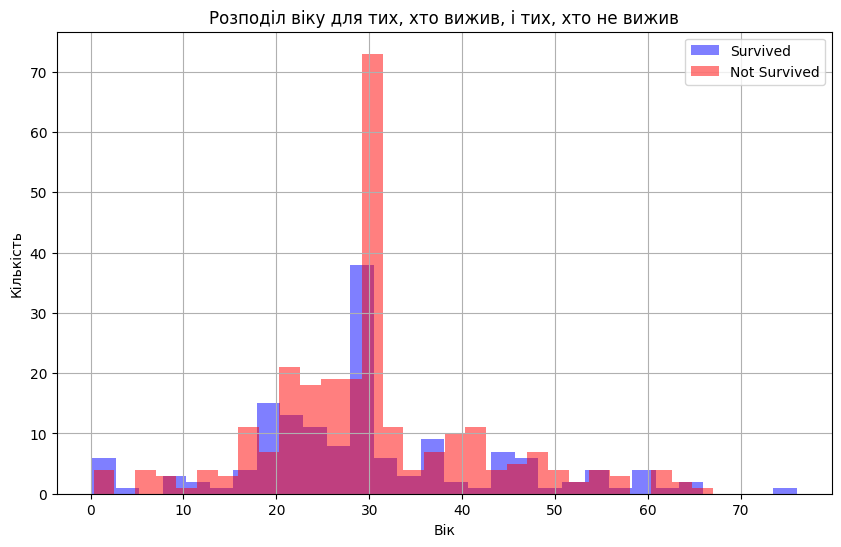

In [28]:
# 20. Побудова гістограми розподілу віку для тих, хто вижив, і тих, хто не вижив
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
selected_data[selected_data['Survived'] == 1]['Age'].hist(alpha=0.5, color='blue', bins=30, label='Survived')
selected_data[selected_data['Survived'] == 0]['Age'].hist(alpha=0.5, color='red', bins=30, label='Not Survived')
plt.legend()
plt.title('Розподіл віку для тих, хто вижив, і тих, хто не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

In [29]:
# 21. Відсоток виживання для кожної комбінації статі та класу
survival_by_sex_class = selected_data.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("\nВідсоток виживання залежно від статі та класу:")
print(survival_by_sex_class)


Відсоток виживання залежно від статі та класу:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [30]:

# 22. Кореляція між усіма числовими змінними
correlation_matrix = selected_data.corr()
print("\nКореляція між числовими змінними:")
print(correlation_matrix)

survival_correlation = correlation_matrix['Survived'].sort_values(ascending=False)
print("\nКореляція змінних з виживанням:")
print(survival_correlation)


Кореляція між числовими змінними:
          Survived    Pclass       Sex       Age      Fare
Survived  1.000000 -0.108615  1.000000 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.108615 -0.440782 -0.576619
Sex       1.000000 -0.108615  1.000000 -0.000011  0.191382
Age      -0.000011 -0.440782 -0.000011  1.000000  0.326800
Fare      0.191382 -0.576619  0.191382  0.326800  1.000000

Кореляція змінних з виживанням:
Survived    1.000000
Sex         1.000000
Fare        0.191382
Age        -0.000011
Pclass     -0.108615
Name: Survived, dtype: float64
